                         Mean         Median       Std Dev  Skewness  \
Account_length      27.270059      26.000000     16.648057  0.216300   
Total_income    181228.194562  157500.000000  99277.305097  2.659363   
Age                 43.784093      42.741466     11.625768  0.150406   
Years_employed       5.664730       3.761884      6.342241  1.844965   

                 Kurtosis  
Account_length  -1.089961  
Total_income    15.780787  
Age             -1.053284  
Years_employed   4.222818  


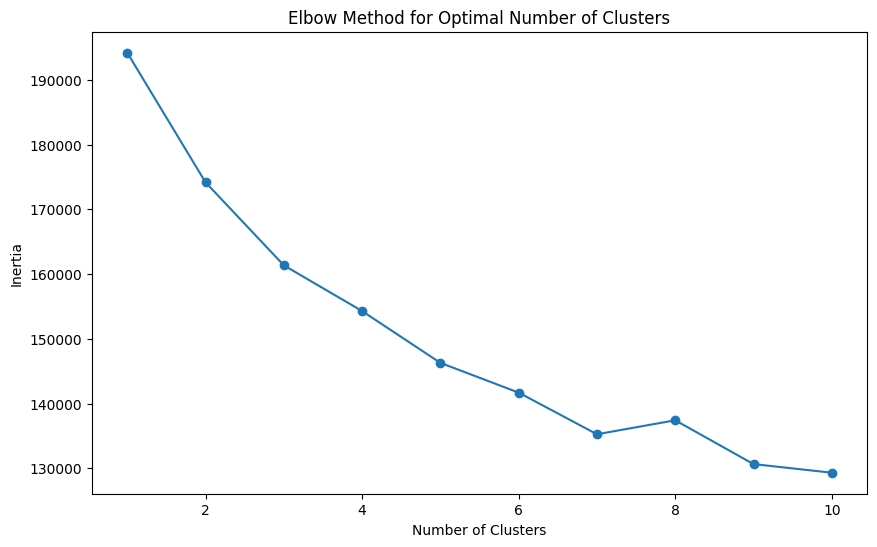

Cluster predictions: Cluster
2    3347
3    2626
0    2050
1    1686
Name: count, dtype: int64


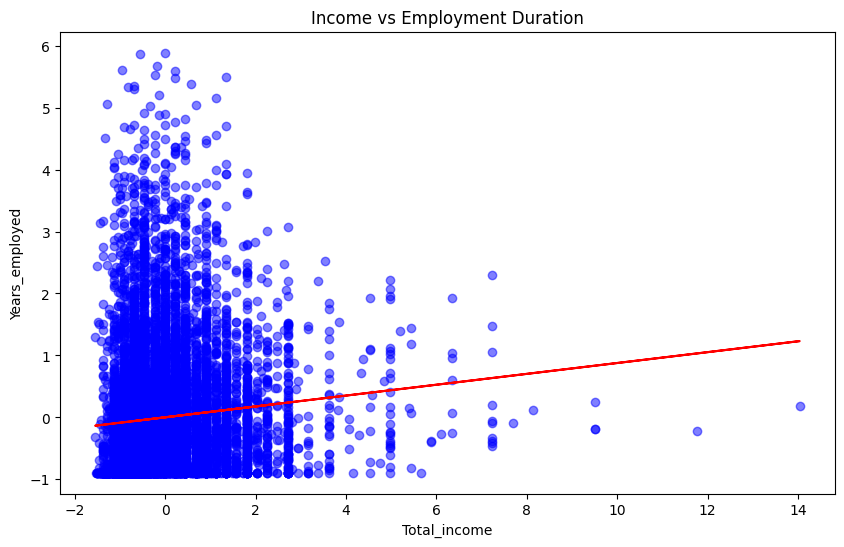

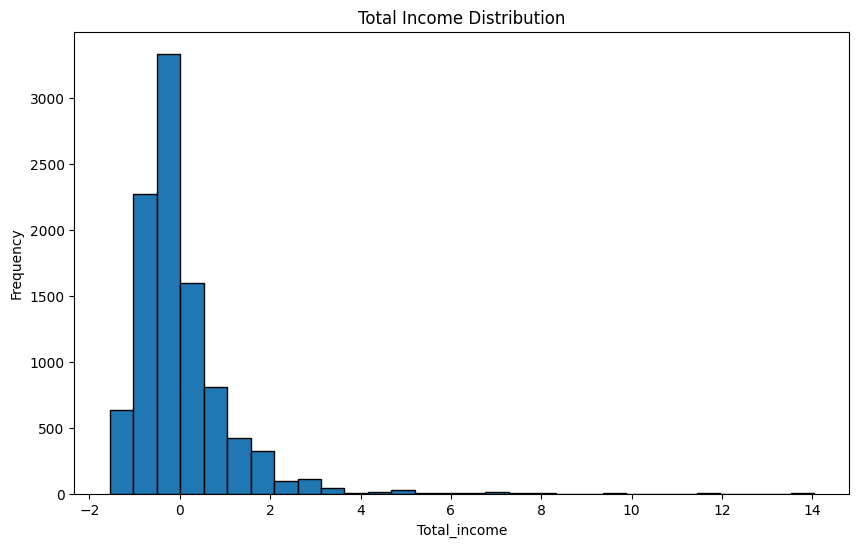

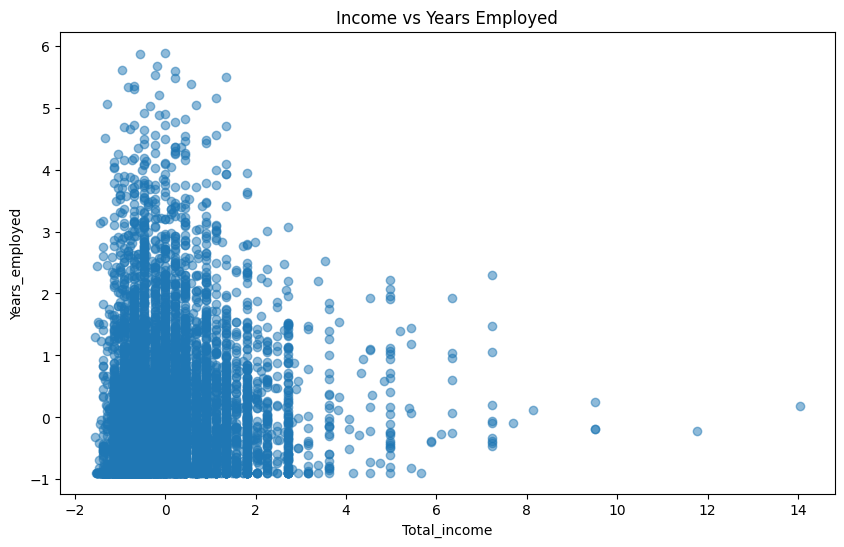

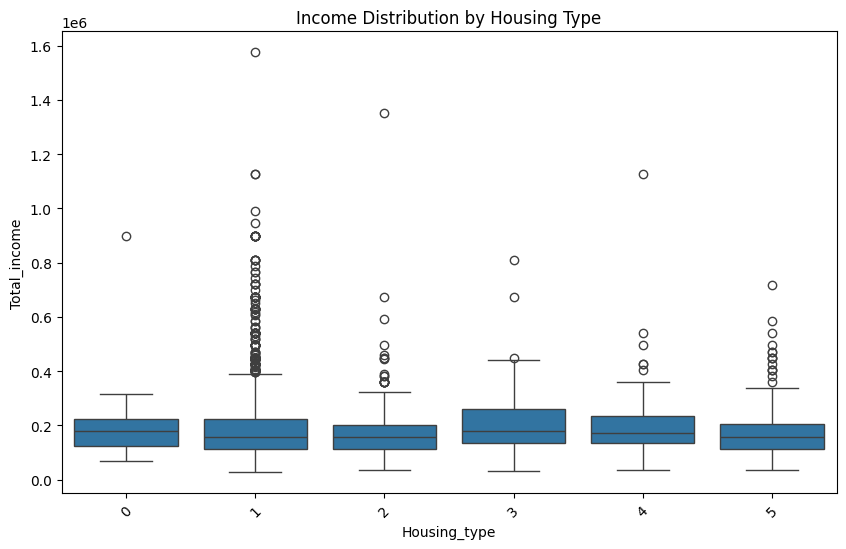

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load the dataset from the specified CSV file path.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - DataFrame: Loaded dataset.
    """
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    """
    Preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical data.
    
    Parameters:
    - df (DataFrame): Dataset to be preprocessed.
    
    Returns:
    - DataFrame: Preprocessed and scaled dataset.
    """
    df.dropna(inplace=True)
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    df_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=[np.number]).columns)
    return df_scaled

def display_statistics(df):
    """
    Calculate and display statistics such as mean, median, standard deviation, skewness, and kurtosis for the dataset.
    
    Parameters:
    - df (DataFrame): Dataset for which statistics are calculated.
    
    Returns:
    - DataFrame: Statistics for each column.
    """
    important_columns = ['Account_length', 'Total_income', 'Age', 'Years_employed']
    statistics = {
        'Mean': df[important_columns].mean(),
        'Median': df[important_columns].median(),
        'Std Dev': df[important_columns].std(),
        'Skewness': df[important_columns].skew(),
        'Kurtosis': df[important_columns].kurtosis()
    }
    return pd.DataFrame(statistics)
def fit_kmeans(data, n_clusters):
    """
    Fit KMeans clustering model to the data.
    
    Parameters:
    - data (DataFrame): Preprocessed dataset to fit the model.
    - n_clusters (int): Number of clusters to form.
    
    Returns:
    - array: Cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.predict(data)

def plot_elbow_method(data, max_clusters=10):
    """
    Plot the elbow method graph to help determine the optimal number of clusters.
    
    Parameters:
    - data (DataFrame): Preprocessed dataset to plot.
    - max_clusters (int): Maximum number of clusters to consider.
    
    Returns:
    - None
    """
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

def plot_line_fitting(data, x_column, y_column, title):
    """
    Fit a linear regression model to the data and plot the fitting line.
    
    Parameters:
    - data (DataFrame): Preprocessed dataset for modeling.
    - x_column (str): Independent variable.
    - y_column (str): Dependent variable.
    - title (str): Title of the plot.
    
    Returns:
    - LinearRegression: Fitted linear regression model.
    """
    X = data[x_column].values.reshape(-1, 1)
    y = data[y_column].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5)
    plt.plot(X, y_pred, color='red')
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
    return model

def plot_histogram(data, column, title):
    """
    Plot a histogram for a specified column to show the distribution of data.
    
    Parameters:
    - data (DataFrame): Dataset containing the column.
    - column (str): Column name for which the histogram is plotted.
    - title (str): Title of the plot.
    
    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    data[column].plot(kind='hist', bins=30, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_scatter(data, x_column, y_column, title):
    """
    Plot a scatter plot to examine the relationship between two variables.
    
    Parameters:
    - data (DataFrame): Dataset containing the columns.
    - x_column (str): Column name for the x-axis.
    - y_column (str): Column name for the y-axis.
    - title (str): Title of the plot.
    
    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def plot_boxplot(data, x_column, y_column, title):
    """
    Plot a box plot to visualize the distribution of a variable across different categories.
    
    Parameters:
    - data (DataFrame): Dataset containing the columns.
    - x_column (str): Column name for the x-axis representing categories.
    - y_column (str): Column name for the y-axis representing numerical data.
    - title (str): Title of the plot.
    
    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()

def main():
    file_path = 'dataset.csv'
    df = load_data(file_path)
    if df is not None:
        df_scaled = preprocess_data(df)
        important_columns = ['Account_length', 'Total_income', 'Age', 'Years_employed']
        statistics = display_statistics(df)
        print(statistics)
        

        # Specify the DataFrame with only the important columns if needed
        # This assumes that df_scaled already contains only numeric columns
        # If df_scaled includes non-numeric columns, use df_scaled[important_columns] instead
        
        plot_elbow_method(df_scaled)  # Pass DataFrame filtered by important columns

        n_clusters = 4  # Assuming from elbow method
        cluster_labels = fit_kmeans(df_scaled, n_clusters)
        df['Cluster'] = cluster_labels
        print("Cluster predictions:", df['Cluster'].value_counts())

        plot_line_fitting(df_scaled, 'Total_income', 'Years_employed', 'Income vs Employment Duration')
        plot_histogram(df_scaled, 'Total_income', 'Total Income Distribution')
        plot_scatter(df_scaled, 'Total_income', 'Years_employed', 'Income vs Years Employed')
        plot_boxplot(df, 'Housing_type', 'Total_income', 'Income Distribution by Housing Type')

if __name__ == "__main__":
    main()
